In [2]:
from scipy.io.wavfile import read
from matplotlib.pyplot import specgram

import numpy as np
import os

import glob

%matplotlib inline

In [3]:
GENRE_DIR = './data'

In [4]:
wave_file = './data/blues/blues.00000.wav'

sample_rate, X = read(wave_file)

print(sample_rate, X.shape)

22050 (661794,)


(array([[  2.02865053e+03,   4.49683403e+02,   7.90929104e+02, ...,
           4.55535859e+04,   4.35044448e+02,   6.12046014e+04],
        [  2.59272125e+03,   9.28672820e+01,   2.14143417e+03, ...,
           1.21956137e+05,   8.30512285e+03,   5.78669820e+04],
        [  7.61948799e+01,   2.20630632e+02,   1.67143351e+03, ...,
           3.17851140e+03,   1.16124557e+05,   3.48552070e+04],
        ..., 
        [  1.08628323e-05,   1.22880986e-06,   6.88120642e-06, ...,
           1.78134914e-06,   2.93860371e-05,   3.75231509e-06],
        [  1.33972681e-06,   8.86845454e-06,   2.55168404e-06, ...,
           3.61171114e-06,   1.33017928e-05,   3.05477455e-06],
        [  1.12169062e-05,   6.27800592e-06,   3.39563175e-07, ...,
           4.36369045e-06,   2.68525073e-06,   5.34089139e-07]]),
 array([     0.       ,     86.1328125,    172.265625 ,    258.3984375,
           344.53125  ,    430.6640625,    516.796875 ,    602.9296875,
           689.0625   ,    775.1953125,    861.3

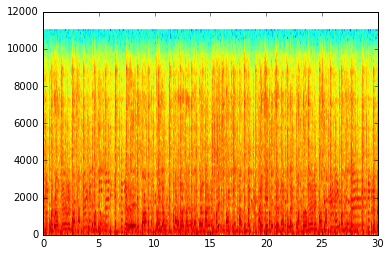

In [5]:
specgram(X, Fs=sample_rate, xextent=(0,30))

In [8]:
def create_fft(fn):
    sample_rate, X = read(fn)
    fft_features = abs(scipy.fft(X)[:1000])
    base_fn, ext = os.path.splitext(fn)
    data_fn = base_fn + ".fft"
    np.save(data_fn, fft_features)
    
def read_fft(genre_list, base_dir=GENRE_DIR):
    X = []
    y = []
    X_y = []
    for label, genre in enumerate(genre_list):
        genre_dir = os.path.join(base_dir, genre, "*.fft.npy")
        file_list = glob.glob(genre_dir)
        for fn in file_list:
            fft_features = np.load(fn)
            X.append(fft_features[:1000])
            label_list = np.zeros(len(genre_list))
            label_list[label] = 1.0
            y.append(label_list)
            data = fft_features[:1000]
            data_with_label = np.append(label_list, data)
            X_y.append(data_with_label)
            
    return np.array(X), np.array(y), np.array(X_y)

In [9]:
genre_list = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [78]:


for genre in genre_list:
    data_file = './data/{0}/*.wav'.format(genre)
    wave_file_list = glob.glob(data_file)
    # print(wave_file_list)
    for wave_file in wave_file_list:
        create_fft(wave_file)

['./data/blues/blues.00000.wav', './data/blues/blues.00001.wav', './data/blues/blues.00002.wav', './data/blues/blues.00003.wav', './data/blues/blues.00004.wav', './data/blues/blues.00005.wav', './data/blues/blues.00006.wav', './data/blues/blues.00007.wav', './data/blues/blues.00008.wav', './data/blues/blues.00009.wav', './data/blues/blues.00010.wav', './data/blues/blues.00011.wav', './data/blues/blues.00012.wav', './data/blues/blues.00013.wav', './data/blues/blues.00014.wav', './data/blues/blues.00015.wav', './data/blues/blues.00016.wav', './data/blues/blues.00017.wav', './data/blues/blues.00018.wav', './data/blues/blues.00019.wav', './data/blues/blues.00020.wav', './data/blues/blues.00021.wav', './data/blues/blues.00022.wav', './data/blues/blues.00023.wav', './data/blues/blues.00024.wav', './data/blues/blues.00025.wav', './data/blues/blues.00026.wav', './data/blues/blues.00027.wav', './data/blues/blues.00028.wav', './data/blues/blues.00029.wav', './data/blues/blues.00030.wav', './data

In [10]:
X_ds , Y_ds, X_y = read_fft(genre_list, base_dir='./data')

In [11]:
X_ds

array([[  1294305.        ,    611108.41316938,    607865.28460888, ...,
           897396.99501985,   9651904.46931878,   4729478.55497998],
       [   831474.        ,    129425.9453431 ,    128297.85708707, ...,
          4322340.50530934,    676992.37758542,  12684822.59774517],
       [   477200.        ,     51994.55494371,     45358.26222789, ...,
          4164374.42002872,   4685192.95491742,    944441.20395389],
       ..., 
       [   231624.        ,    102133.90910046,     94842.71694156, ...,
            78075.19008132,    552480.94280664,   1038207.84871036],
       [   308799.        ,     23161.33629584,     17800.98515457, ...,
           563649.53624314,    754423.61440959,    312936.01202751],
       [   368552.        ,     43679.5465293 ,     34453.01065596, ...,
           366628.94300997,    170505.70492296,    188079.62057049]])

In [10]:
Y_ds

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [12]:
import pandas as pd
import tensorflow as tf
import random

In [13]:
def index_selector(total_size, rate=0.7):
    random_idx = []
    while len(random_idx) != int(total_size*rate):
        chose = random.randint(0, total_size-1)
        if chose not in random_idx:
            random_idx.append(chose)
    return random_idx

def create_train_test(X_ds, Y_ds, rate=0.7):
    train_idx = index_selector(len(X_ds), rate)
    test_idx = []
    for i in range(0, len(X_ds)-1):
        if i in train_idx:
            continue
        test_idx.append(i)

    train_x = [X_ds[index] for index in train_idx]
    train_y = [Y_ds[index] for index in train_idx]
    test_x = [X_ds[index] for index in test_idx]
    test_y = [Y_ds[index] for index in test_idx]
    return train_x, train_y, test_x, test_y

tr_x, tr_y, te_x, te_y = create_train_test(X_ds, Y_ds)

In [33]:
# def init_weights(shape):
#     return tf.Variable(tf.random_normal(shape, stddev=0.01))


# def model(X, w):
#     return tf.matmul(X, w)

# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, output_size)) # compute mean cross entropy (softmax is applied internally)
# train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct optimizer
# predict_op = tf.argmax(py_x, 1) # at predict time, evaluate the argmax of the logistic regression


# w = init_weights([input_cell_num,  len(genre_list)]) 


# # Launch the graph in a session
# with tf.Session() as sess:
#     # you need to initialize all variables
#     tf.initialize_all_variables().run()

#     for i in range(10000):
#         for start, end in zip(range(0, len(tr_x), 500), range(500, len(tr_x), 512)):
#             sess.run(train_op, feed_dict={input_size: tr_x[start:end], output_size: tr_y[start:end]})
        
#         if i % 50 == 0:
#             print(i, np.mean(np.argmax(te_y, axis=1) ==
#                          sess.run(predict_op, feed_dict={input_size: te_x, output_size: te_y})))


# Parameters
learning_rate = 0.03
training_epochs = 100
batch_size = 100
display_step = 1
input_cell_num = 1000

# layers
inputs    = tf.placeholder("float", [None, input_cell_num]) 
outputs = tf.placeholder("float", [None, len(genre_list)])

# Create model
# Set model weights
W = tf.Variable(tf.zeros([input_cell_num, len(genre_list)]))
# Set bias
b = tf.Variable(tf.zeros([len(genre_list)]))
# Construct model
activation = tf.nn.softmax(tf.matmul(inputs, W) + b) # Softmax
# Minimize error using cross entropy
# Cross entropy
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(activation, outputs))
cost = -tf.reduce_sum(outputs * tf.log(activation)) 
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(tr_x)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            for start, end in zip(range(0, len(tr_x), 500), range(500, len(tr_x), 512)):
                batch_xs, batch_ys = tr_x[start:end], tr_y[start:end]
                sess.run(optimizer, feed_dict={inputs: batch_xs, outputs: batch_ys})
            
                # Compute average loss
                # print(batch_ys)
                # print(sess.run(cost, feed_dict={inputs: batch_xs, outputs: batch_ys}))
                avg_cost += sess.run(cost, feed_dict={inputs: batch_xs, outputs: batch_ys})/total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
        # Test model
        correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(outputs, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Accuracy:", accuracy.eval({inputs: te_x, outputs: te_y}))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(outputs, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({inputs: te_x, outputs: te_y}))

Epoch: 0001 cost= nan
Accuracy: 0.123333
Epoch: 0002 cost= nan
Accuracy: 0.123333
Epoch: 0003 cost= nan
Accuracy: 0.123333
Epoch: 0004 cost= nan
Accuracy: 0.123333
Epoch: 0005 cost= nan
Accuracy: 0.123333
Epoch: 0006 cost= nan
Accuracy: 0.123333
Epoch: 0007 cost= nan
Accuracy: 0.123333
Epoch: 0008 cost= nan
Accuracy: 0.123333
Epoch: 0009 cost= nan
Accuracy: 0.123333
Epoch: 0010 cost= nan
Accuracy: 0.123333
Epoch: 0011 cost= nan
Accuracy: 0.123333
Epoch: 0012 cost= nan
Accuracy: 0.123333
Epoch: 0013 cost= nan
Accuracy: 0.123333
Epoch: 0014 cost= nan
Accuracy: 0.123333
Epoch: 0015 cost= nan
Accuracy: 0.123333
Epoch: 0016 cost= nan
Accuracy: 0.123333
Epoch: 0017 cost= nan
Accuracy: 0.123333
Epoch: 0018 cost= nan
Accuracy: 0.123333
Epoch: 0019 cost= nan
Accuracy: 0.123333
Epoch: 0020 cost= nan
Accuracy: 0.123333
Epoch: 0021 cost= nan
Accuracy: 0.123333
Epoch: 0022 cost= nan
Accuracy: 0.123333
Epoch: 0023 cost= nan
Accuracy: 0.123333
Epoch: 0024 cost= nan
Accuracy: 0.123333
Epoch: 0025 cost

In [109]:
import random

def train_idx(total_size, rate=0.7):
    random_idx = []
    while len(random_idx) != int(total_size*rate):
        chose = random.randint(0, total_size-1)
        if chose not in random_idx:
            random_idx.append(chose)
    return random_idx

ls = train_idx(70)
ls.sort()
len(ls)

49